In [1]:
!pip install -q opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import opendatasets as od

# **Load and visualize dataset (optional PCA for 2D view)**

In [3]:
od.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python', data_dir='dataset')

csv_file_path = "/content/dataset/customer-segmentation-tutorial-in-python/Mall_Customers.csv"
data = pd.read_csv(csv_file_path)

data.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joisesarakkal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████| 1.55k/1.55k [00:00<00:00, 3.30MB/s]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


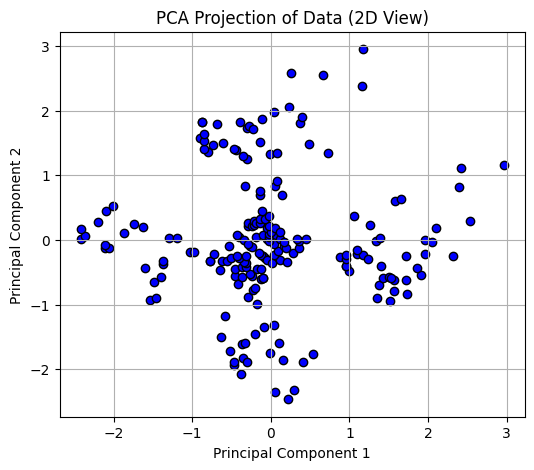

In [4]:
# Select relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Optional: Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k')
plt.title("PCA Projection of Data (2D View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# **Fit K-Means and assign cluster labels**

In [5]:
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Assign labels
data['Cluster'] = kmeans.labels_

# Show sample results
data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


# **Use the Elbow Method to find optimal K**

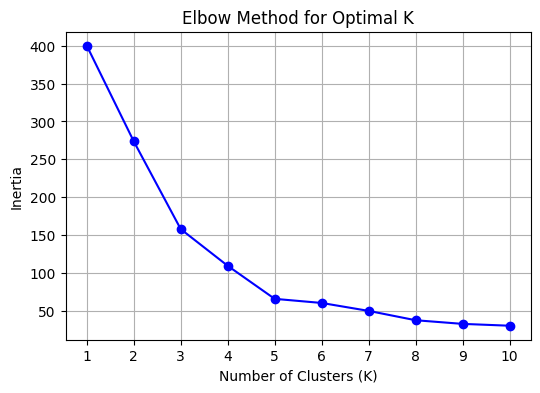

In [6]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# **Visualize clusters with color-coding**

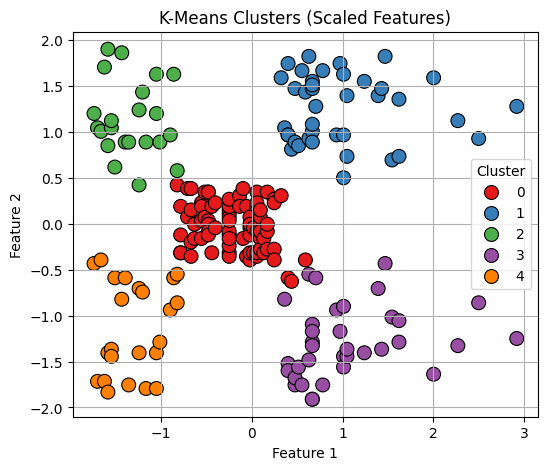

In [7]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=data['Cluster'],
    palette='Set1',
    s=100,
    edgecolor='k'
)
plt.title("K-Means Clusters (Scaled Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# **Evaluate clustering using Silhouette Score**

In [8]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score for K={kmeans.n_clusters}: {sil_score:.4f}")

Silhouette Score for K=5: 0.5547
